# Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('online_shopping_intention.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Visualization

<Axes: xlabel='Month'>

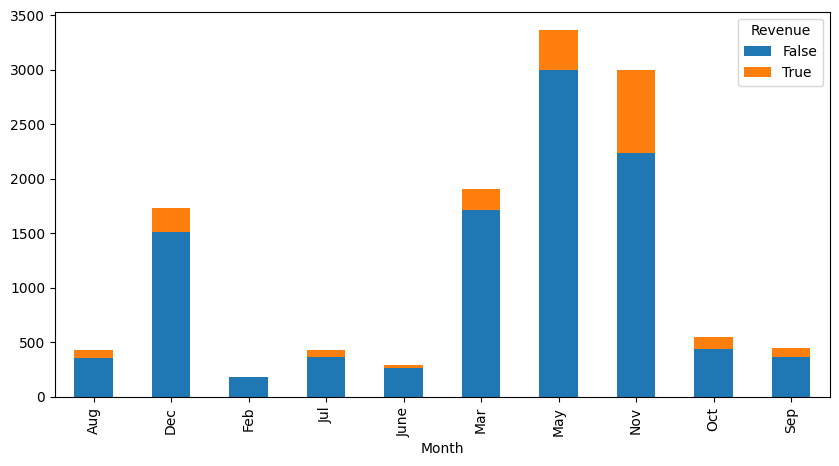

In [ ]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

<Axes: xlabel='Weekend'>

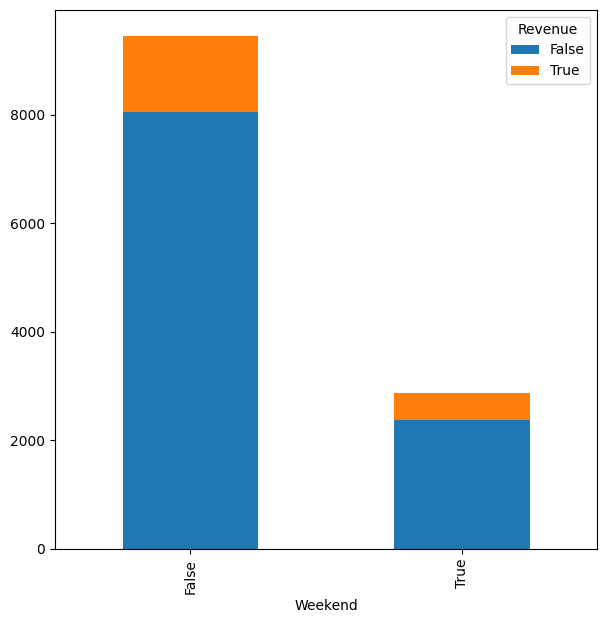

In [ ]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<Axes: ylabel='VisitorType'>

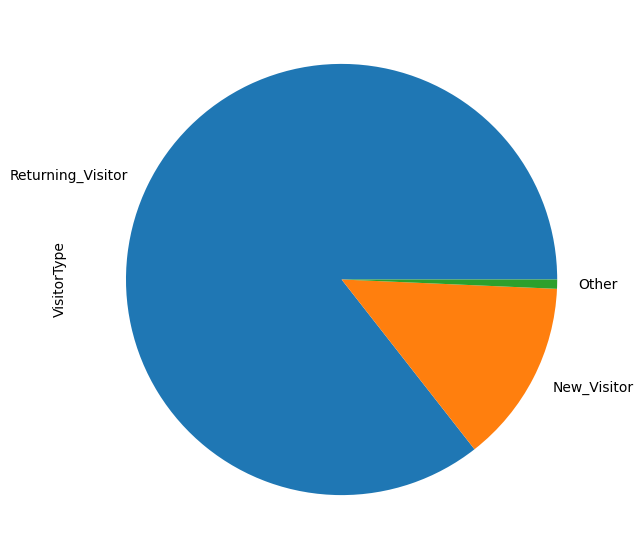

In [ ]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<Axes: >

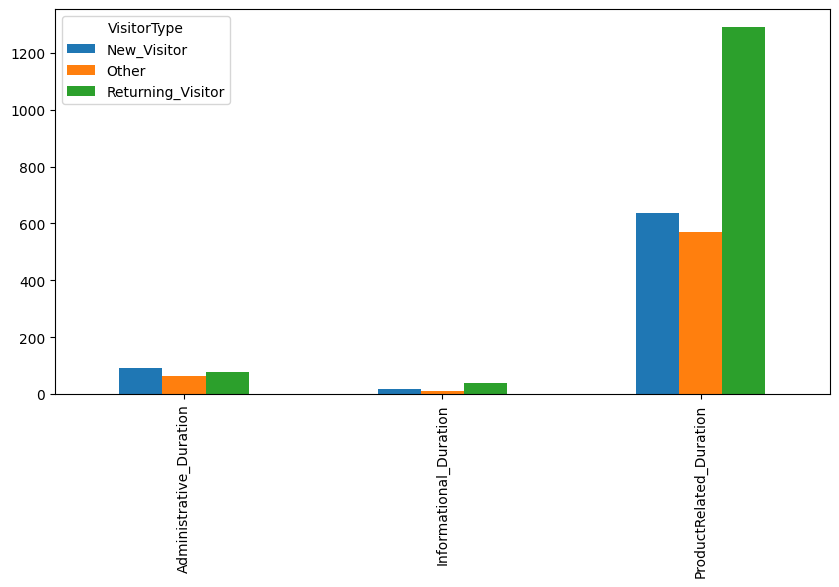

In [ ]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

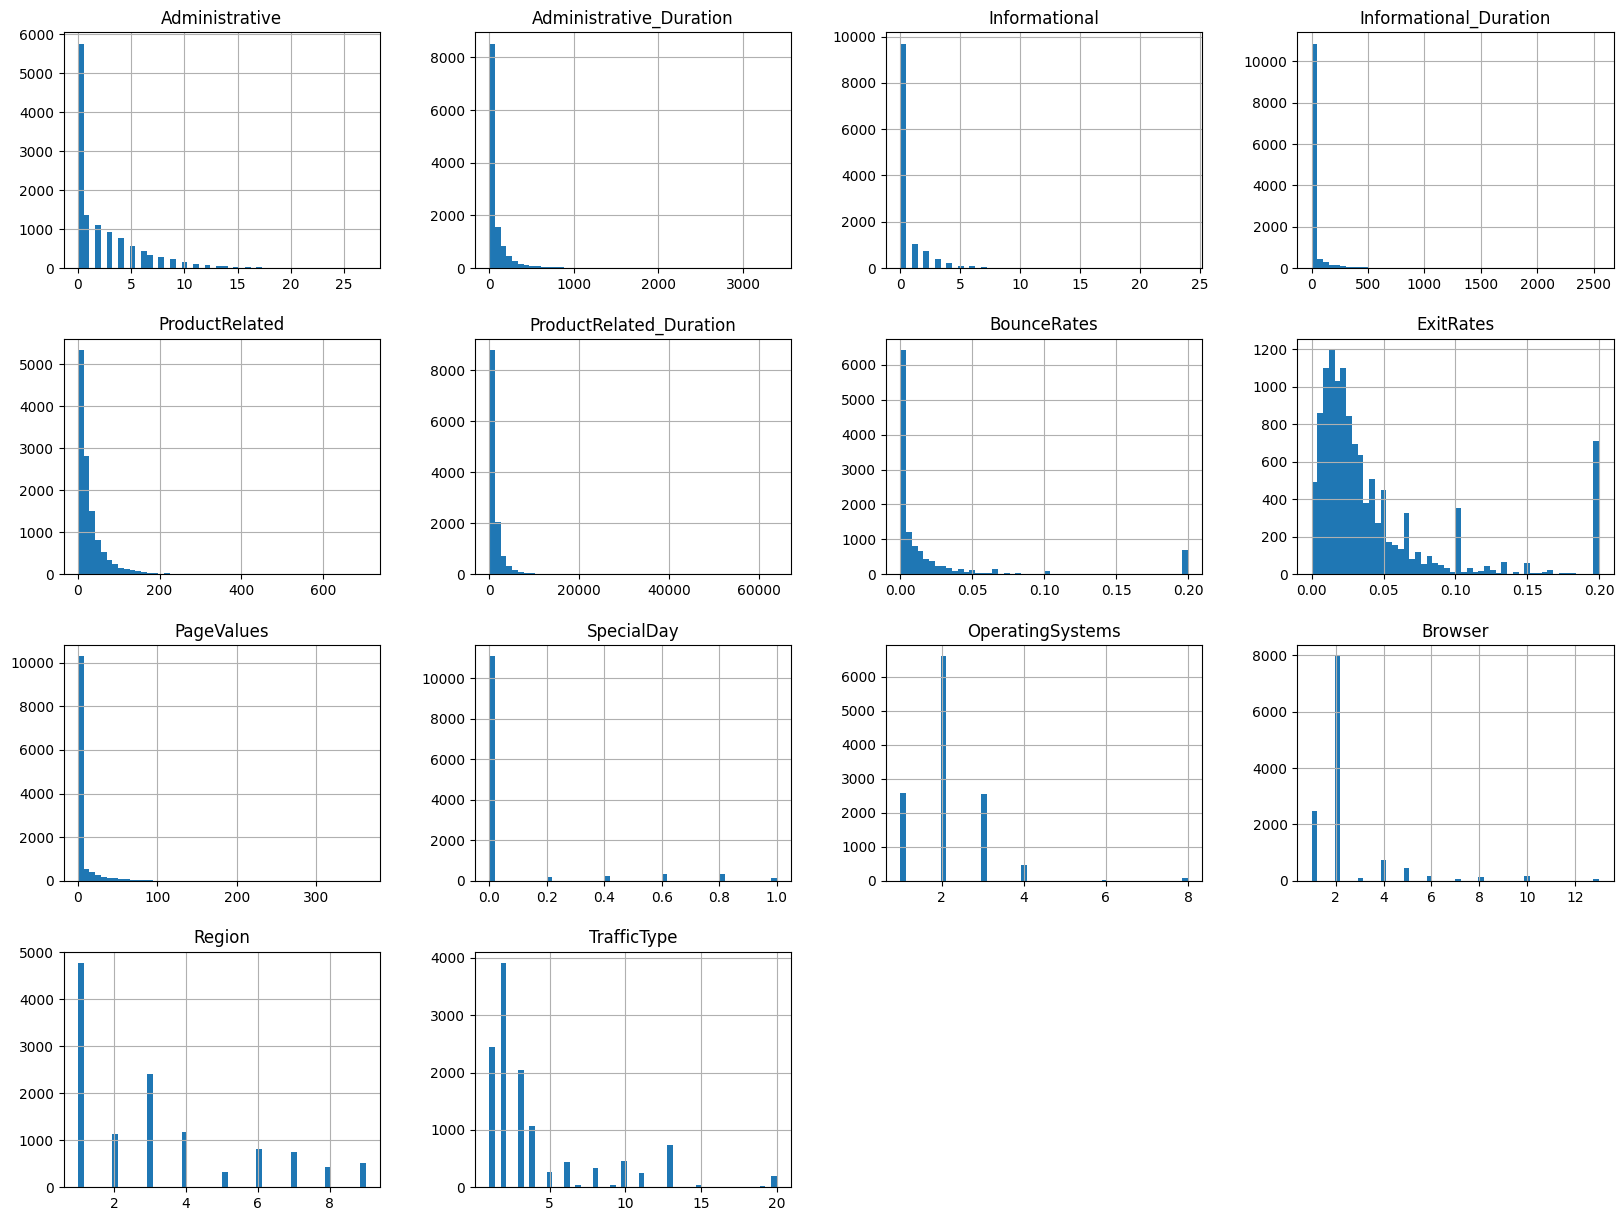

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Data Cleaning and Standardization

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<Axes: >

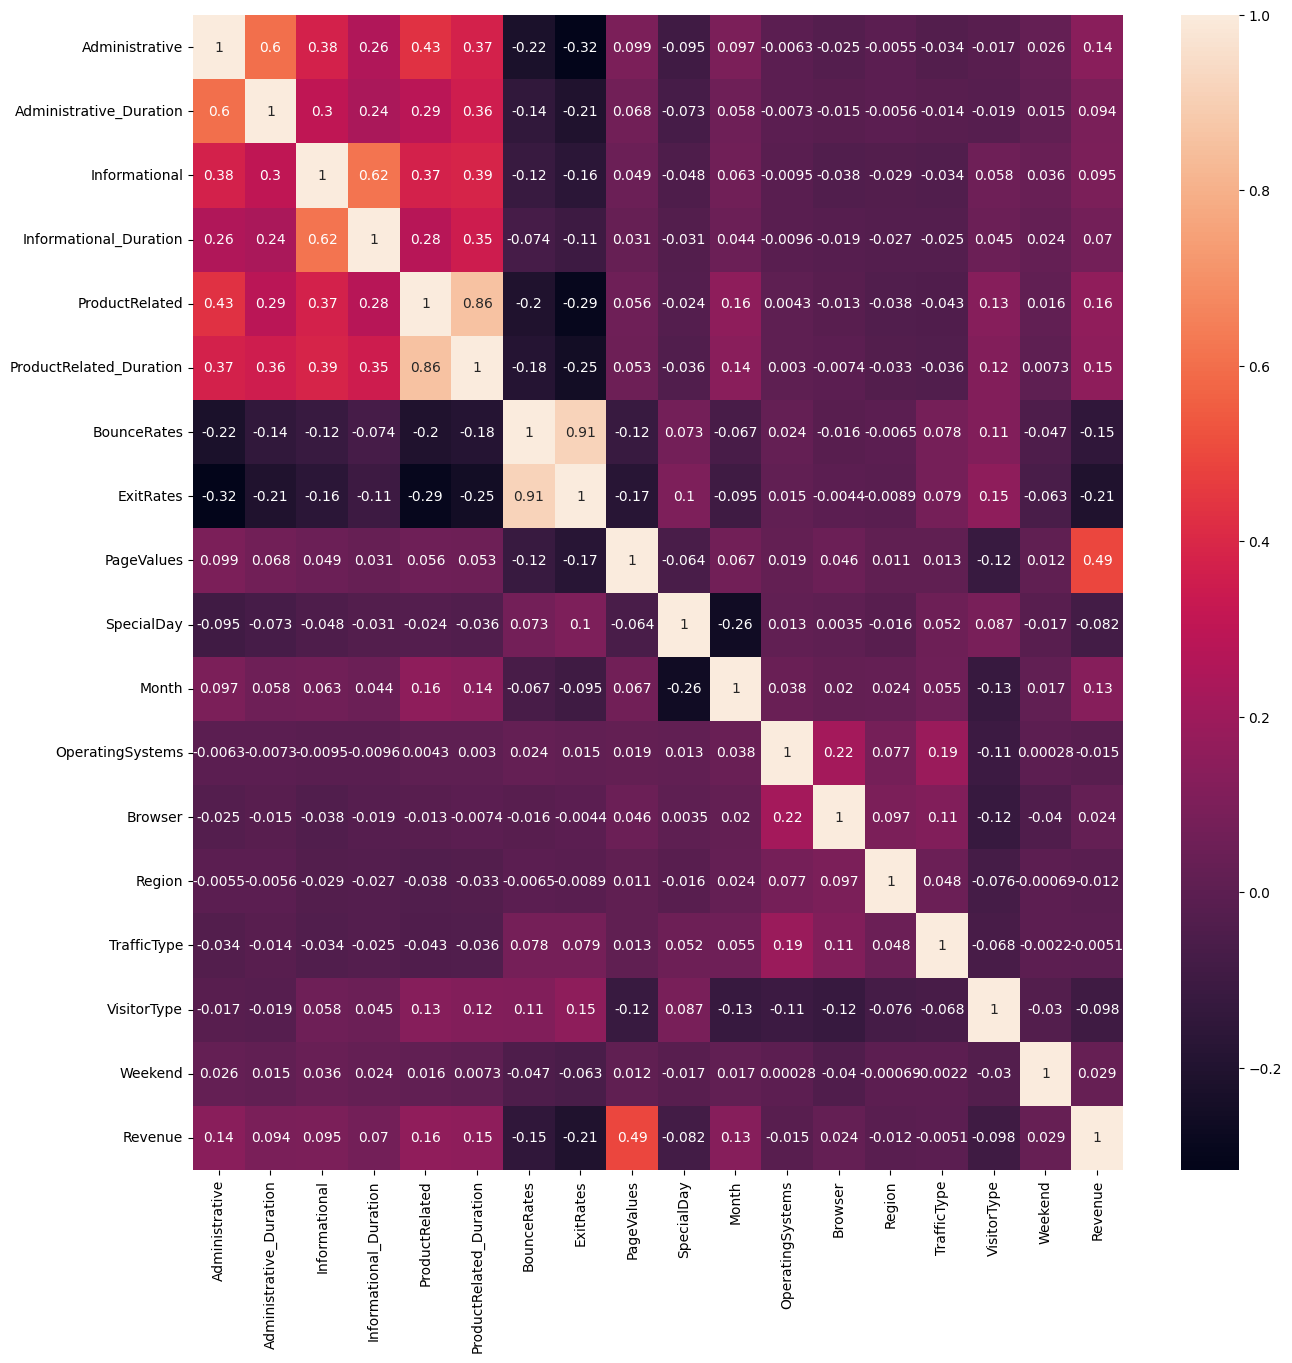

In [ ]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Revenue', axis = 1))
scaled_features = scaler.transform(df.drop('Revenue', axis = 1))

df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,3,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,3,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,3,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,3,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,3,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,3,0,0


# K Nearest Neighbor - Built-in

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      scaled_features, df['Revenue'], test_size = 0.30)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
knn_euclid = KNeighborsClassifier(n_neighbors = 17,p=2)
knn_euclid.fit(X_train, y_train)
pred_euclid = knn_euclid.predict(X_test)

cm_euclid = confusion_matrix(y_test,pred_euclid)
print(classification_report(y_test, pred_euclid))

acc_euclid = accuracy_score(y_test, pred_euclid)
print("Accuracy : ",acc_euclid)
print(cm_euclid)
sns.heatmap(cm_euclid,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_euclid = confusion_matrix(y_test,pred_euclid,normalize='all')
print(cmn_euclid)
sns.heatmap(cmn_euclid,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Revenue'], test_size = 0.30)

knn_manhattan = KNeighborsClassifier(n_neighbors = 17,p=1)
knn_manhattan.fit(X_train, y_train)
pred_manhattan = knn_manhattan.predict(X_test)

cm_manhattan = confusion_matrix(y_test,pred_manhattan)
print(classification_report(y_test, pred_manhattan))

acc_manhattan = accuracy_score(y_test, pred_manhattan)
print("Accuracy : ",acc_manhattan)
print(cm_manhattan)
sns.heatmap(cm_manhattan,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_manhattan = confusion_matrix(y_test,pred_manhattan,normalize='all')
print(cmn_manhattan)
sns.heatmap(cmn_manhattan,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Revenue'], test_size = 0.30)

knn_minkowski = KNeighborsClassifier(n_neighbors = 17,p=3)
knn_minkowski.fit(X_train, y_train)
pred_minkowski = knn_minkowski.predict(X_test)

cm_minkowski = confusion_matrix(y_test,pred_minkowski)
print(classification_report(y_test, pred_minkowski))

acc_minkowski = accuracy_score(y_test, pred_minkowski)
print("Accuracy : ",acc_minkowski)
print(cm_minkowski)
sns.heatmap(cm_minkowski,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_minkowski = confusion_matrix(y_test,pred_minkowski,normalize='all')
print(cmn_minkowski)
sns.heatmap(cmn_minkowski,
annot=True,
fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Target Label',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
func = ['Euclidean','Manhattan','Minkowski']
cms = [cm_euclid,cm_manhattan,cm_minkowski]
cmns = [cmn_euclid,cmn_manhattan,cmn_minkowski]
t = [acc_euclid,acc_manhattan,acc_minkowski]
x = func
y = cms
z = cmns
res = pd.DataFrame({"Distance Function": x, "Accuracy": t,"Confusion Matrix": y})
print(res)


# K Nearest Neighbor - User Defined

In [ ]:
import numpy as np

def knn_euclidean(k, train, test, y_train):
    predictions = []
    for i in range(len(test)):
        distances = []
        for j in range(len(train)):
            dist = np.sqrt(np.sum((test[i] - train[j])**2))
            distances.append((dist, j))
        distances.sort()
        neighbors = distances[:k]
        labels = [y_train[index] for dist, index in neighbors]
        predictions.append(max(set(labels), key=labels.count))
    return predictions

def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total

y_pred = knn_euclidean(3, X_train, X_test, list(y_train))
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8656393619897269


In [ ]:
def knn_manhattan(k, train, test, y_train):
    predictions = []
    for i in range(len(test)):
        distances = []
        for j in range(len(train)):
            dist = np.sum(np.abs(test[i] - train[j]))
            distances.append((dist, j))
        distances.sort()
        neighbors = distances[:k]
        labels = [y_train[index] for dist, index in neighbors]
        predictions.append(max(set(labels), key=labels.count))
    return predictions

def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total

y_pred_manhattan = knn_manhattan(3, X_train, X_test, list(y_train))
acc_manhattan = accuracy(y_test, y_pred_manhattan)
print("Accuracy (Manhattan):", acc_manhattan)

Accuracy (Manhattan): 0.8656393619897269


In [ ]:
def knn_minkowski(k, train, test, y_train, p=2):
    predictions = []
    for i in range(len(test)):
        distances = []
        for j in range(len(train)):
            dist = np.power(np.sum(np.power(np.abs(test[i] - train[j]), p)), 1/p)
            distances.append((dist, j))
        distances.sort()
        neighbors = distances[:k]
        labels = [y_train[index] for dist, index in neighbors]
        predictions.append(max(set(labels), key=labels.count))
    return predictions

def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total

y_pred_minkowski = knn_minkowski(3, X_train, X_test, list(y_train), p=3)
acc_minkowski = accuracy(y_test, y_pred_minkowski)
print("Accuracy (Minkowski):", acc_minkowski)

Accuracy (Minkowski): 0.8675317653419843


## ROC curve

No Skill: ROC AUC=0.500
KNN (Euclidean): ROC AUC=0.676
KNN (Manhattan): ROC AUC=0.667
KNN (Minkowski): ROC AUC=0.687


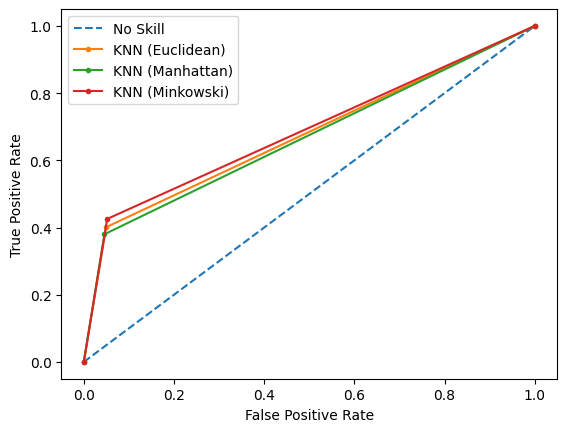

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ns_probs = [0 for _ in range(len(y_test))]

knn_probs_euclidean = [1 if pred == 1 else 0 for pred in y_pred]

knn_probs_manhattan = [1 if pred == 1 else 0 for pred in y_pred_manhattan]

knn_probs_minkowski = [1 if pred == 1 else 0 for pred in y_pred_minkowski]

ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc_euclidean = roc_auc_score(y_test, knn_probs_euclidean)
knn_auc_manhattan = roc_auc_score(y_test, knn_probs_manhattan)
knn_auc_minkowski = roc_auc_score(y_test, knn_probs_minkowski)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN (Euclidean): ROC AUC=%.3f' % (knn_auc_euclidean))
print('KNN (Manhattan): ROC AUC=%.3f' % (knn_auc_manhattan))
print('KNN (Minkowski): ROC AUC=%.3f' % (knn_auc_minkowski))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr_euclidean, knn_tpr_euclidean, _ = roc_curve(y_test, knn_probs_euclidean)
knn_fpr_manhattan, knn_tpr_manhattan, _ = roc_curve(y_test, knn_probs_manhattan)
knn_fpr_minkowski, knn_tpr_minkowski, _ = roc_curve(y_test, knn_probs_minkowski)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr_euclidean, knn_tpr_euclidean, marker='.', label='KNN (Euclidean)')
plt.plot(knn_fpr_manhattan, knn_tpr_manhattan, marker='.', label='KNN (Manhattan)')
plt.plot(knn_fpr_minkowski, knn_tpr_minkowski, marker='.', label='KNN (Minkowski)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Results and Inference

In [ ]:
func = ['Euclidean','Manhattan','Minkowski']
t = [acc,acc_manhattan,acc_minkowski]
x = func
res = pd.DataFrame({"Distance Function": x, "Accuracy": t})
print(res)

  Distance Function  Accuracy
0         Euclidean  0.865639
1         Manhattan  0.865639
2         Minkowski  0.867532
